Import libraries...

In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.

['Pokemon.csv']


Know the data...

In [9]:
pok=pd.read_csv('../input/Pokemon.csv')
pok.head()
pok.drop(['#'],axis=1,inplace=True) #id...
pok.head()
#pok.shape ->(800,12)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Finding the frequency of missing values in each feature/column...

Text(0.5, 1.0, 'Number of missing values in each column')

<Figure size 1440x864 with 0 Axes>

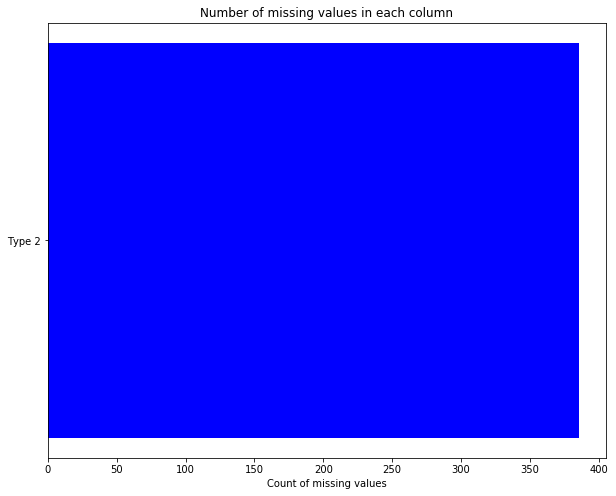

In [10]:
plt.figure(figsize=(20,12))
missing_df = pok.isna().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
#print(missing_df.head())
#print(missing_df.shape)
ind = np.arange(missing_df.shape[0])
#print(ind)
width = 0.2
fig, ax = plt.subplots(figsize=(10,8))
#print(missing_df.missing_count.values)
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
#Only Type2 has missing values (386)...

Boxplots to dig deep into data...

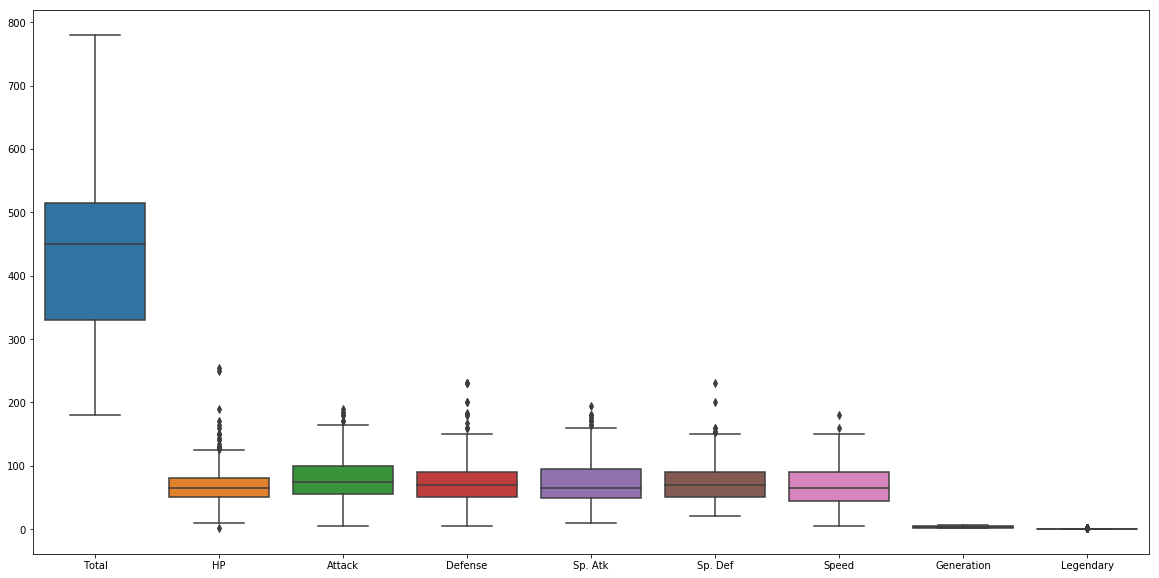

In [11]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=pok) #Outliers can be seen in the features [HP,Speed]

Heatmap to visualize the correlation among different features....

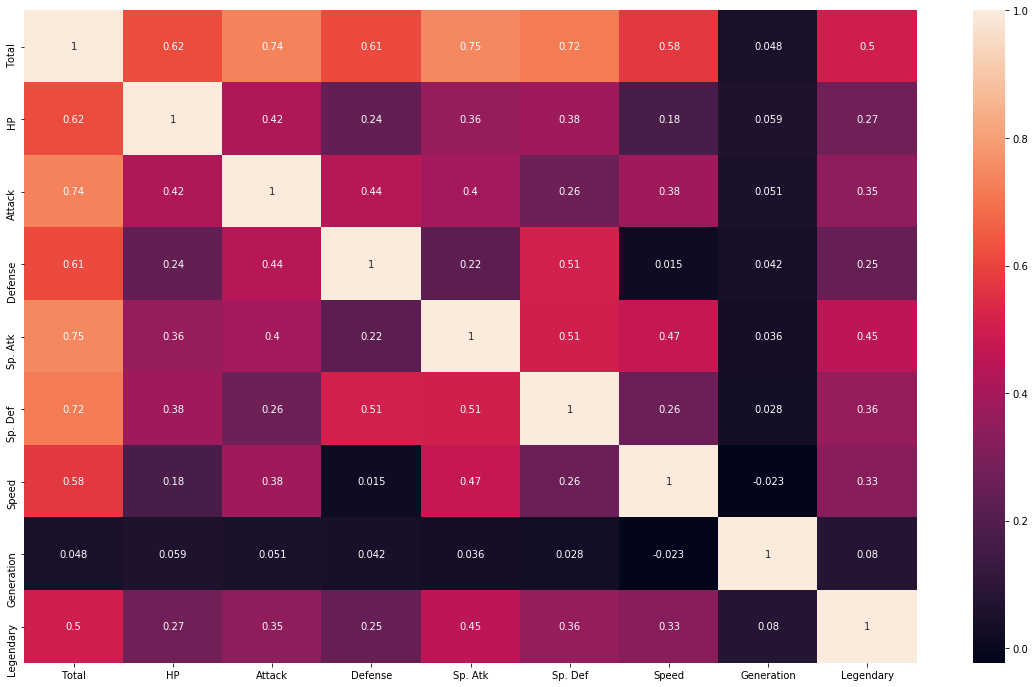

In [12]:
plt.figure(figsize=(20,12))
c=pok.corr()
sns.heatmap(c,annot=True)  #Correlated features can be seen...


To know the count of pokemons for different attributes...

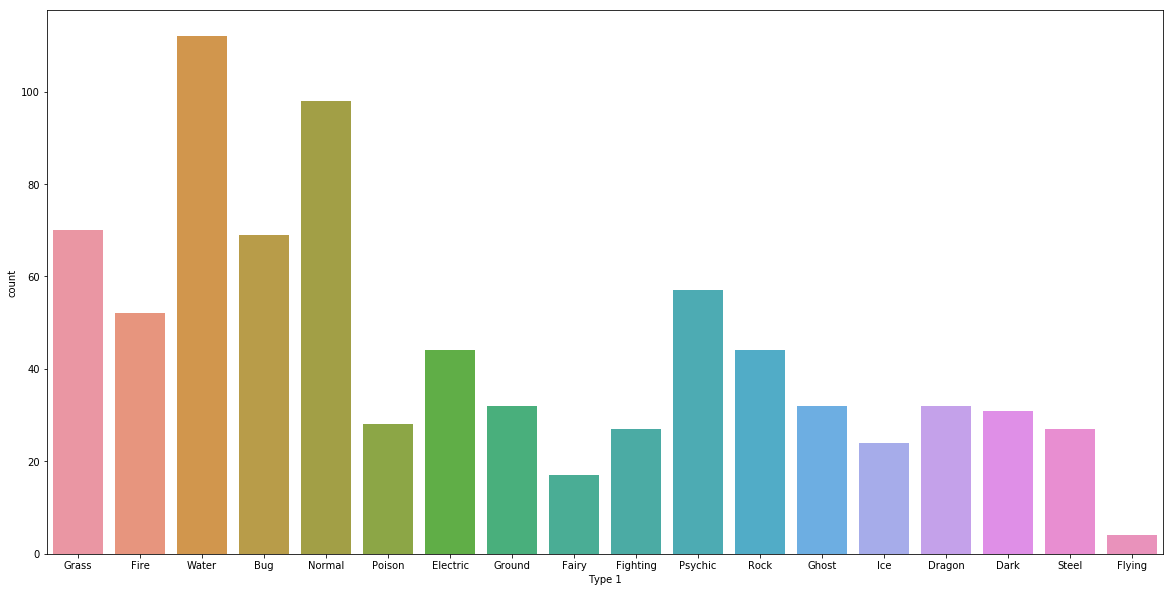

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(pok['Type 1'])

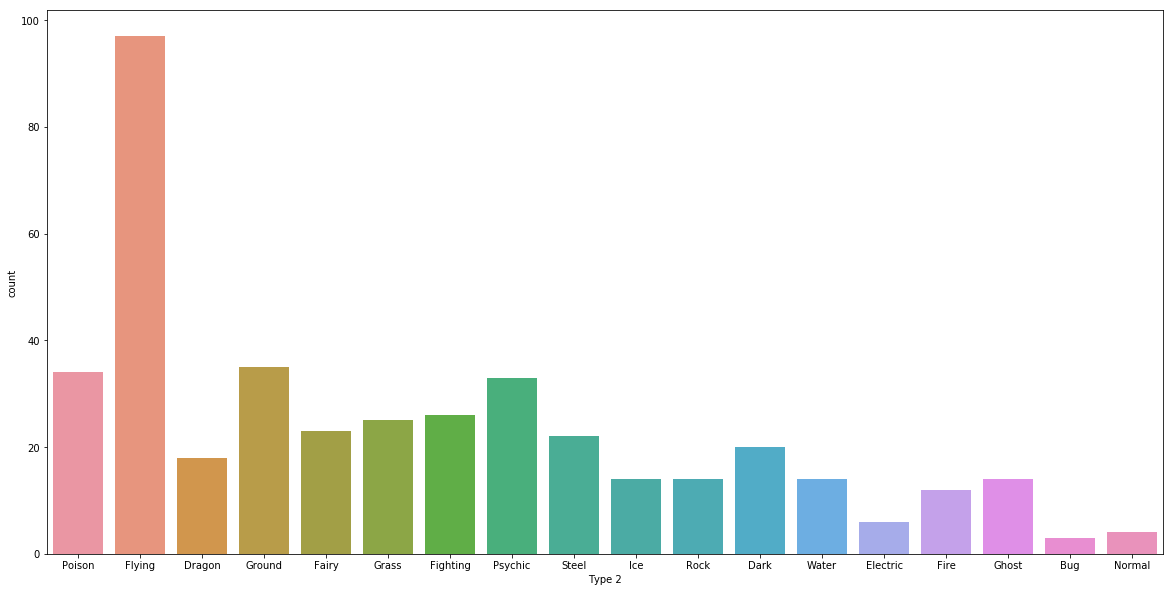

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(pok['Type 2'])

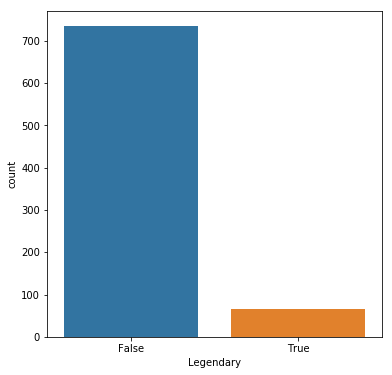

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(pok['Legendary'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



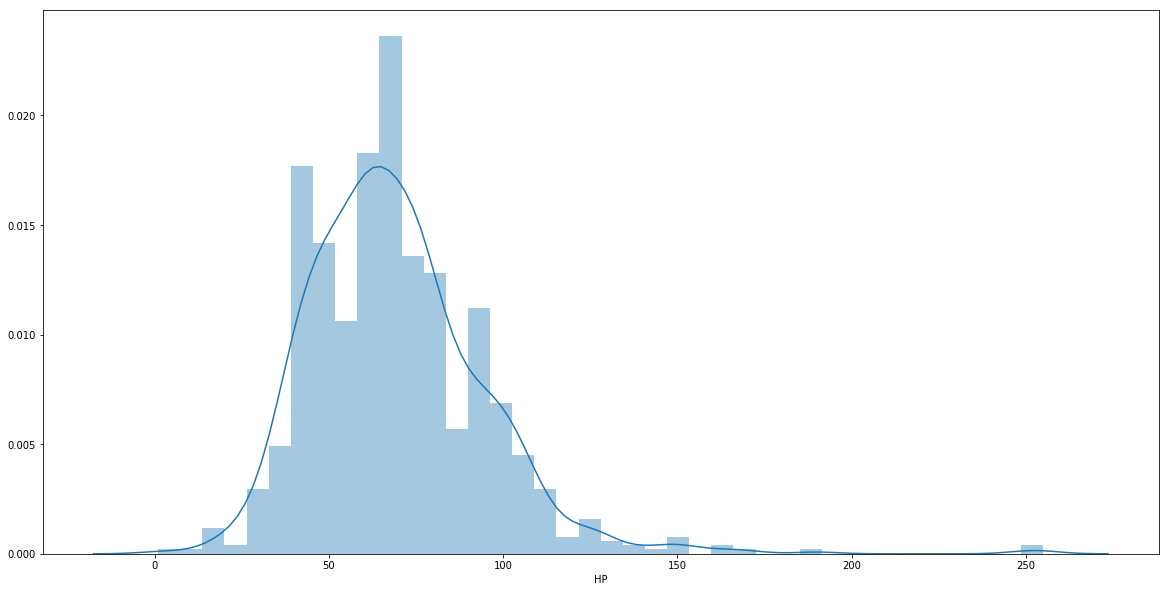

In [16]:
plt.figure(figsize=(20,10))
sns.distplot(pok['HP'])

If Boxplots, why not violin plots, huh?

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



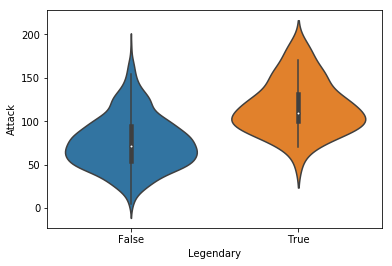

In [17]:
sns.violinplot(x='Legendary', y='Attack', data=pok) #Attacking power of Legendary pokemons is high...

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



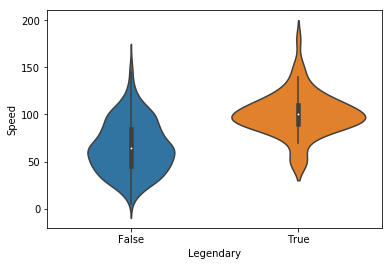

In [18]:
print(pok.columns)
sns.violinplot(x='Legendary', y='Speed', data=pok)

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



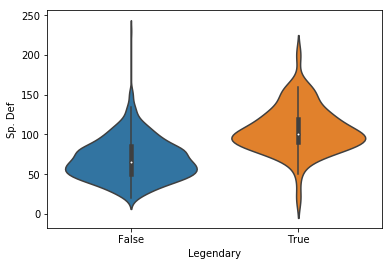

In [19]:
print(pok.columns)
sns.violinplot(x='Legendary', y='Sp. Def', data=pok)

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



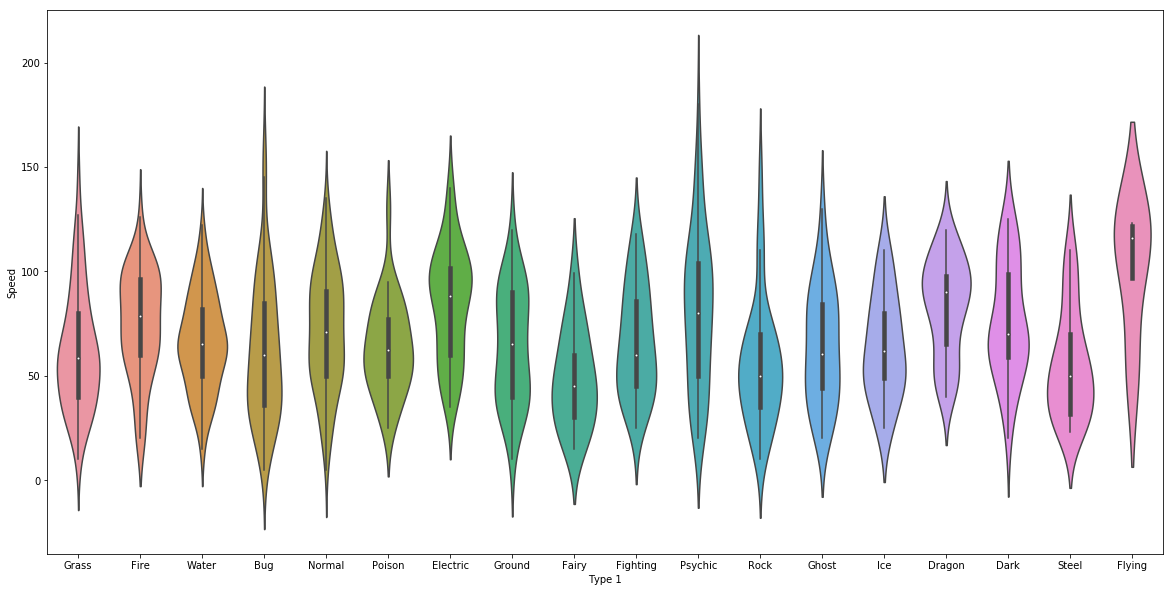

In [20]:
print(pok.columns)
plt.figure(figsize=(20,10))
sns.violinplot(x='Type 1', y='Speed', data=pok)

Jointplot to give scatter plot between the features and the bar plot of each feature... 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



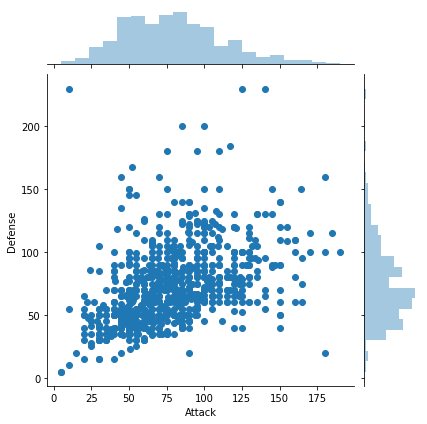

In [21]:
sns.jointplot(x='Attack', y='Defense', data=pok)

Easy to interpret...

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


<Figure size 1440x720 with 0 Axes>

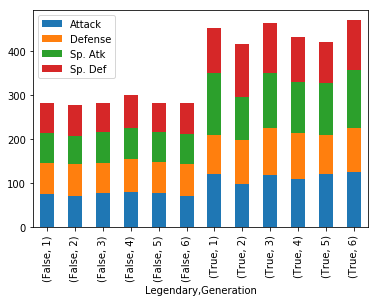

In [22]:
plt.figure(figsize=(20,10))
print(pok.columns)
pok_leg_gen = pok.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense','Sp. Atk','Sp. Def']]
pok_leg_gen.plot.bar(stacked=True)

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


<Figure size 1440x720 with 0 Axes>

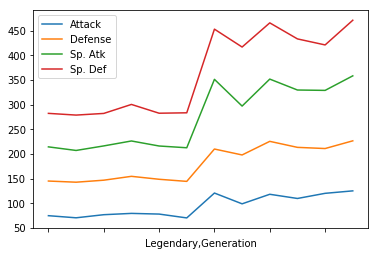

In [23]:
plt.figure(figsize=(20,10))
print(pok.columns)
pok_leg_gen = pok.groupby(['Legendary', 'Generation']).mean()[['Attack', 'Defense','Sp. Atk','Sp. Def']]
pok_leg_gen.plot.line(stacked=True)

Swarmplot with hue=Type 1. Eases the interpretation of data.

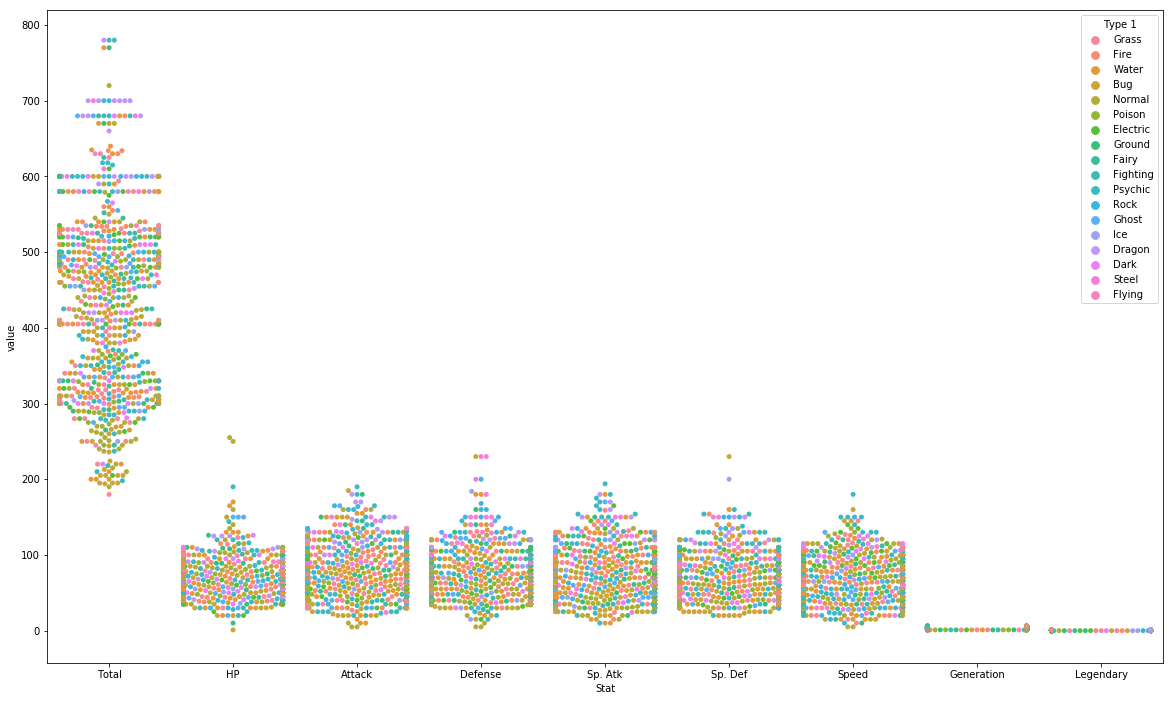

In [24]:
plt.figure(figsize=(20,12))
pkmn = pd.melt(pok, id_vars=["Name", "Type 1", "Type 2"], var_name="Stat")
sns.swarmplot(x="Stat", y="value", data=pkmn, hue="Type 1");

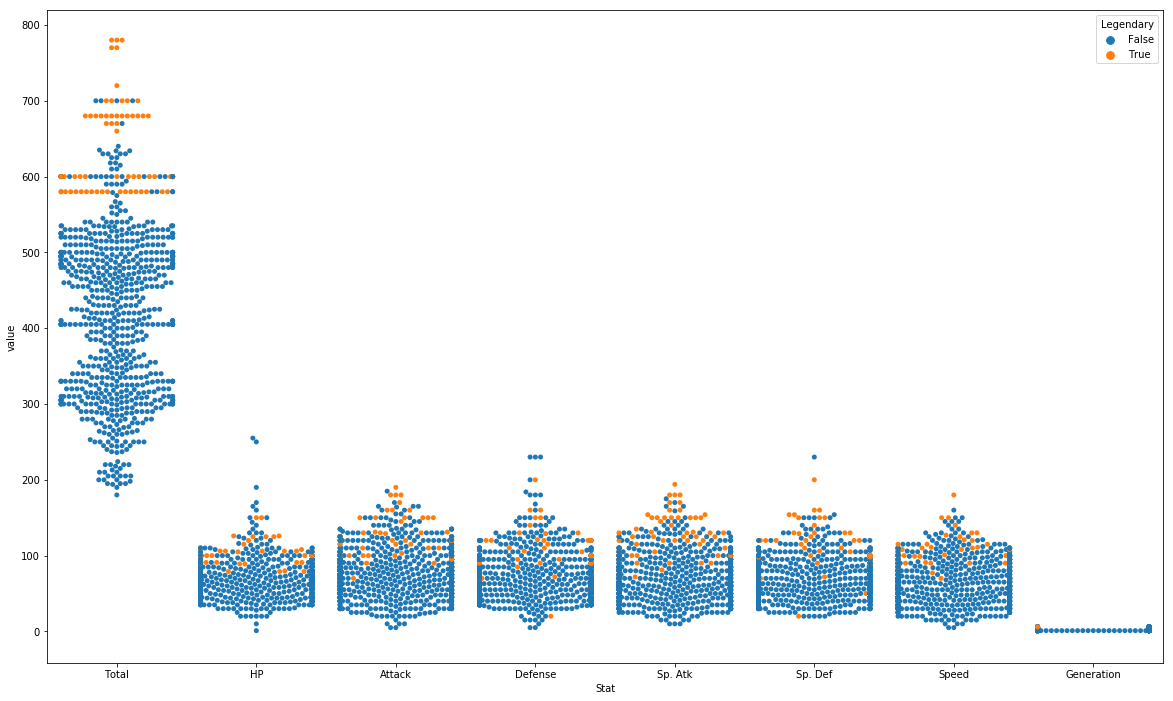

In [25]:
plt.figure(figsize=(20,12))
pkmn = pd.melt(pok, id_vars=["Name", "Type 1", "Type 2", "Legendary"], var_name="Stat")
sns.swarmplot(x="Stat", y="value", data=pkmn, hue="Legendary");

Pie Chart to find the distribution of 'Legendary' feature.

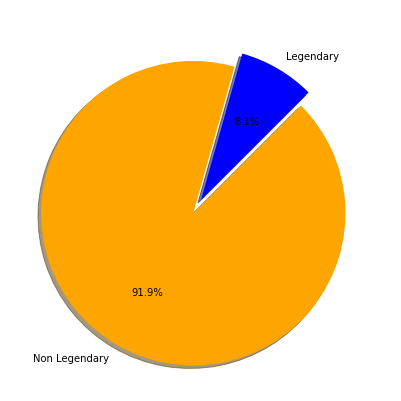

In [26]:
fig = plt.figure(figsize=(7,7))

colours = ["blue", "orange"]
pokeLeg = pok[pok['Legendary']==True]
pokeNon = pok[pok['Legendary']==False]

legDist = [pokeLeg['Name'].count(),pokeNon['Name'].count()]
legPie = plt.pie(legDist,
                 labels= ['Legendary', 'Non Legendary'], 
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors=colours,
                 startangle = 45,
                 explode=(0, 0.1))

Know the count of pokemons belonging to their respective types...

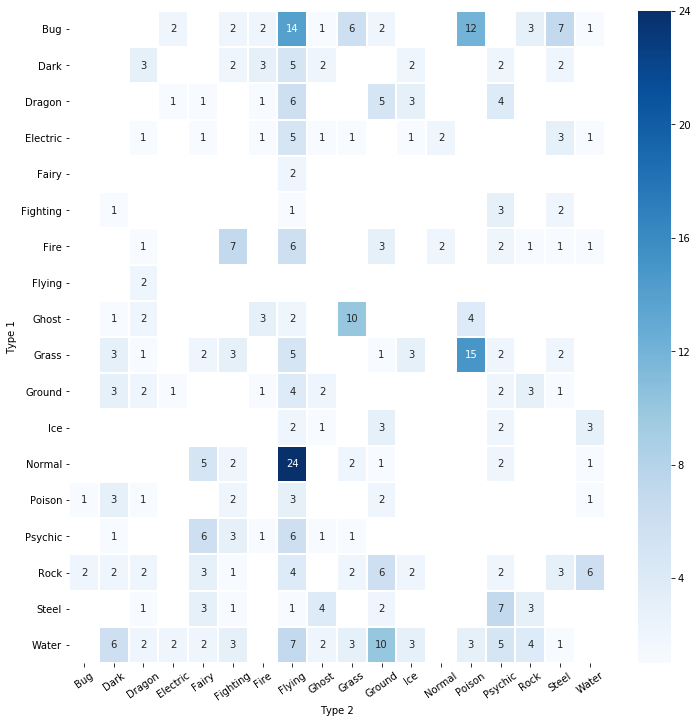

In [27]:
plt.subplots(figsize=(12, 12))

sns.heatmap(
    pok[pok['Type 2']!='None'].groupby(['Type 1', 'Type 2']).size().unstack(),
    linewidths=1,
    annot=True,
    cmap="Blues"
)

plt.xticks(rotation=35)
plt.show()

Gives count of pokemons of each type...

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



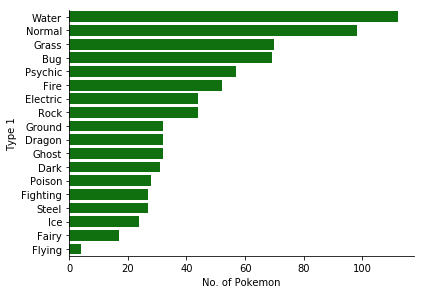

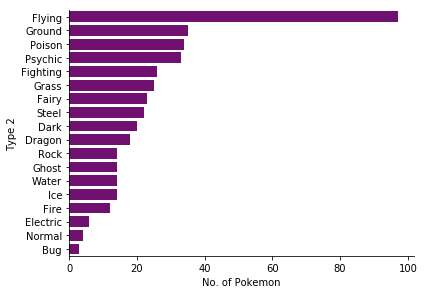

In [28]:
sns.factorplot(
    y='Type 1',
    data=pok,
    kind='count',
    order=pok['Type 1'].value_counts().index,
    size=4,
    aspect=1.5,
    color='green'
).set_axis_labels('No. of Pokemon', 'Type 1')

sns.factorplot(
    y='Type 2',
    data=pok,
    kind='count',
    order=pok['Type 2'].value_counts().index,
    size=4,
    aspect=1.5,
    color='purple'
).set_axis_labels('No. of Pokemon', 'Type 2');

Pie Chart for types of pokemon. ;)

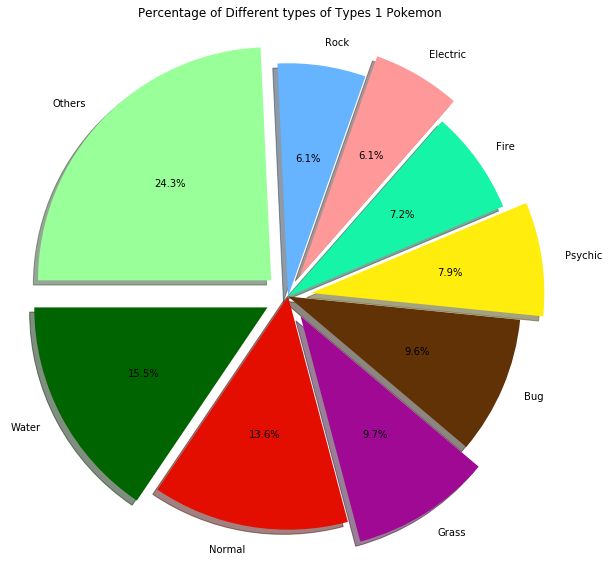

In [29]:
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Others'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0.0, 0.1, 0, 0.1) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Percentage of Different types of Types 1 Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Key function to find the best among all the pokemons...

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



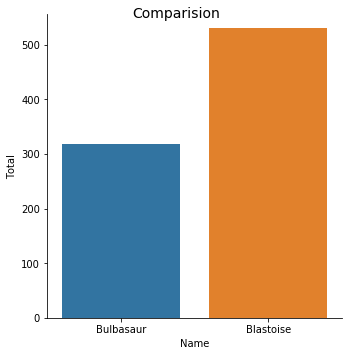

In [30]:
def comp_pok(pok1,pok2,Attribute):
    sample_data = pok[ (pok['Name']==pok1) | (pok['Name']==pok2) ]
    g=sns.factorplot(x='Name',y=Attribute,kind='bar',data=sample_data,aspect=1,size=5)
    g.fig.suptitle('Comparision',fontsize=14)
    
comp_pok('Bulbasaur','Blastoise','Total')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



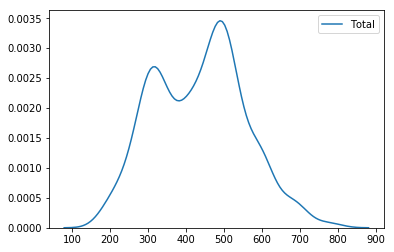

In [31]:
sns.kdeplot(pok['Total'])

Grouping boxplots into one...

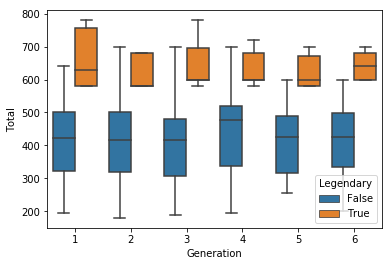

In [32]:
sns.boxplot(x="Generation", y="Total", hue='Legendary', data=pok)

Pairplot to explore bivariate relationships...

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


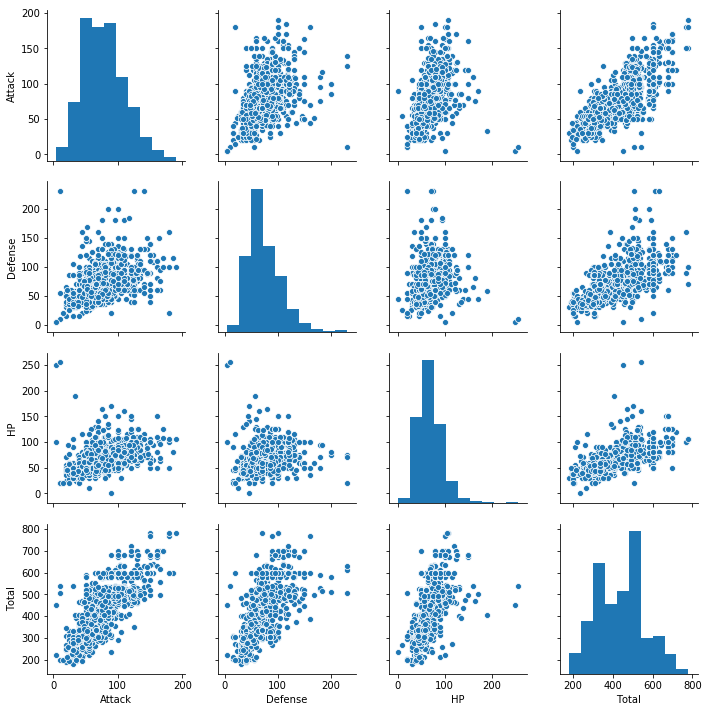

In [33]:
print(pok.columns)
sns.pairplot(pok[['Attack', 'Defense', 'HP', "Total"]])

Getting the visualisations altogether...

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



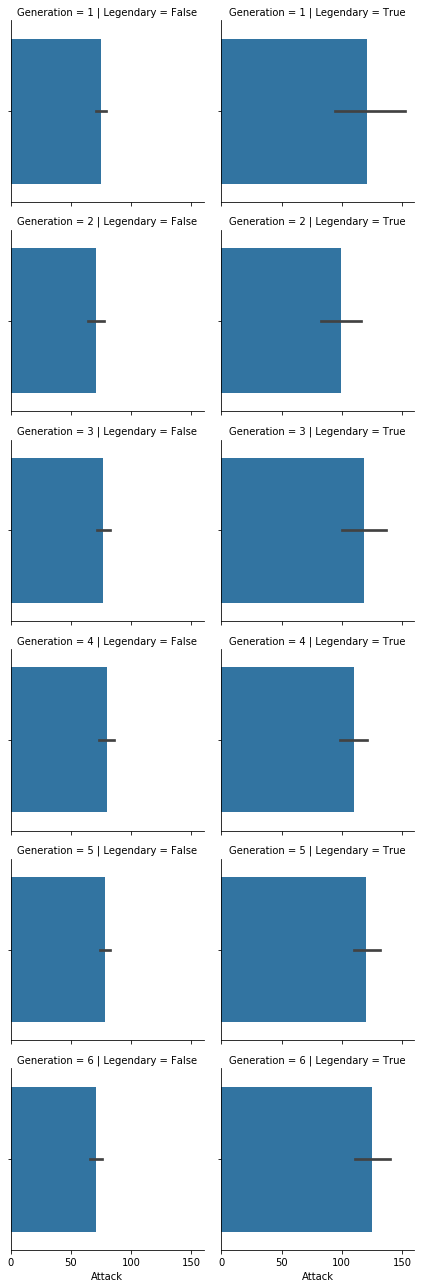

In [34]:
g = sns.FacetGrid(pok, col="Legendary", row="Generation")
g.map(sns.barplot, "Attack")

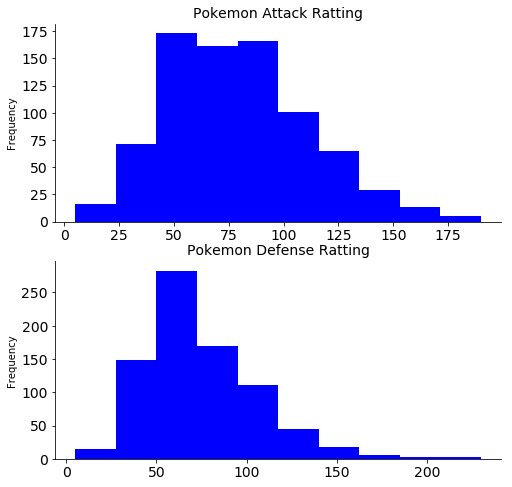

In [35]:
fig, axarr = plt.subplots(2, 1, figsize=(8,8))
pok['Attack'].plot.hist(
    ax=axarr[0],color='blue', fontsize=14
)
axarr[0].set_title('Pokemon Attack Ratting', fontsize=14)

pok['Defense'].plot.hist(
    ax=axarr[1], color='blue', fontsize=14
)
axarr[1].set_title('Pokemon Defense Ratting', fontsize=14)

sns.despine()

In [ ]:
Most interesting part of the repo...

In [36]:
#Function to compare the Pokémon powers
def PokeFight(trace1,trace2,trace3,trace4):
    x = pok[pok["Name"] == trace1]
    trace1 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = trace1
    )
    x = pok[pok["Name"] == trace2]
    trace2 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = trace2
    )
    x = pok[pok["Name"] == trace3]
    trace3 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = trace3
    )
    x = pok[pok["Name"] == trace4]
    trace4 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = trace4
    )

    layout = go.Layout(
      xaxis=dict(
            domain=[0, 0.45]
        ),
        yaxis=dict(
            domain=[0, 0.45]
        ),
        xaxis2=dict(
            domain=[0.55, 1]
        ),
        xaxis3=dict(
            domain=[0, 0.45],
            anchor='y3'
        ),
        xaxis4=dict(
            domain=[0.55, 1],
            anchor='y4'
        ),
        yaxis2=dict(
            domain=[0, 0.45],
            anchor='x2'
        ),
        yaxis3=dict(
            domain=[0.55, 1]
        ),
        yaxis4=dict(
            domain=[0.55, 1],
            anchor='x4'
        ),
      showlegend = True,
      title = "Pokémons' Performance (RAW power)"
    )

    data = [trace1, trace2, trace3, trace4]
    fig = go.Figure(data=data, layout=layout)

    iplot(fig, filename = "Pokemon stats")

PokeFight("Squirtle","Pikachu","Bulbasaur","Charmander")

Yes, we can have 3D visualisations too...

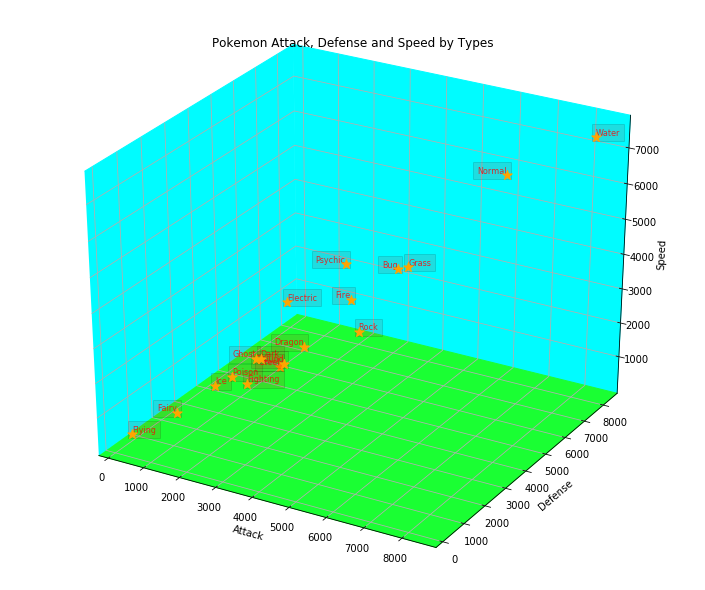

In [37]:
from mpl_toolkits import mplot3d

pok_t1 = pok.groupby('Type 1').sum()

fig = plt.figure()
ax = fig.gca(projection='3d')
fig.subplots_adjust(left=0.4, right=2,bottom=2,top=4)
    
x=pok_t1.Attack
y=pok_t1.Defense
z=pok_t1.Speed
Desc = np.array(pok_t1.index)
    
a = 'right'
for i in range(18):
    ax.scatter(x[i], y[i], z[i], c='orange', marker='*',s=100)
    ax.text(x[i], y[i], z[i], '%s'%(Desc[i]), color='r',alpha=0.8, fontsize=8,horizontalalignment=a,verticalalignment='bottom', \
           bbox=dict(facecolor='red', alpha=0.12)) 
    if a=='right':
        a = 'left'
    else:
        a = 'right'
        
plt.title("Pokemon Attack, Defense and Speed by Types")
 
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('Speed');
ax.w_xaxis.set_pane_color((0.0, 0.99, 1.0,  1.0))
ax.w_yaxis.set_pane_color((0.0, 0.99, 1.0, 1.0))
ax.w_zaxis.set_pane_color((0.1, 1.0, 0.2, 1.0))
    
plt.show()  

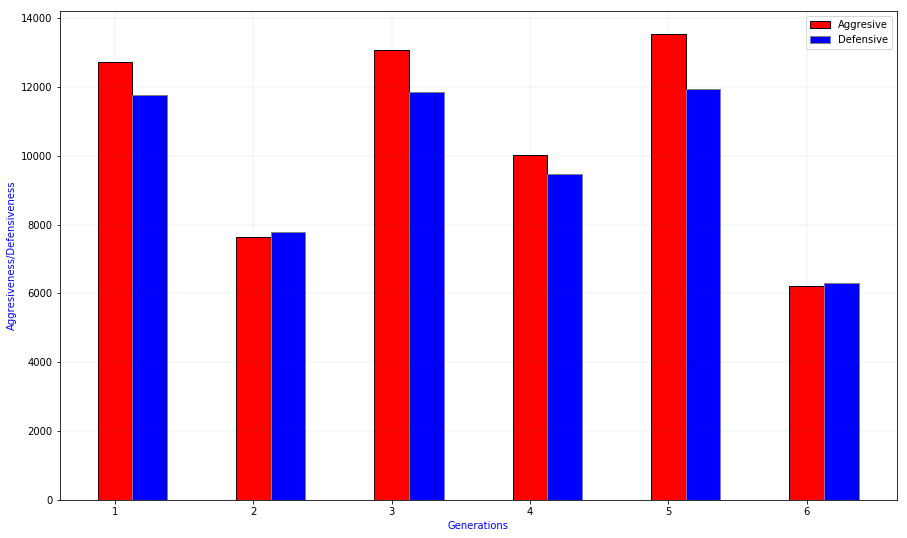

In [38]:
pok_attack = pok.groupby("Generation")["Attack"].sum()
pok_defend = pok.groupby("Generation")["Defense"].sum()

fig = plt.figure(figsize=(15,9))
plt.bar(np.array(pok_attack.index),np.array(pok_attack.values),color='red',edgecolor=['black']*6,width = 0.25,align='center',label='Aggresive')
plt.bar(np.array(pok_defend.index)+0.25,np.array(pok_defend.values),color='blue',edgecolor=['grey']*6,width = 0.25,align='center',label='Defensive')
plt.xlabel("Generations",color='blue')
plt.ylabel("Aggresiveness/Defensiveness",color='blue') #measured by Attack points
plt.legend(loc = 'upper right',)
plt.grid(color='g', linestyle='--', linewidth=0.1)
plt.show()

Know the best pokemons from the given data...

In [39]:
cm = sns.light_palette("orange", as_cmap=True)
pok[['Name','Type 1','Type 2','HP','Total','Legendary']].sort_values(by=['Total'],ascending = False).head(20).sort_values(by=['Legendary','Type 1','Type 2'],ascending = False).reset_index(drop=True).style.background_gradient(cmap=cm)

,Name,Type 1,Type 2,HP,Total,Legendary
0,Palkia,Water,Dragon,90,680,True
1,KyogrePrimal Kyogre,Water,nan,100,770,True
2,DiancieMega Diancie,Rock,Fairy,50,700,True
3,MewtwoMega Mewtwo X,Psychic,Fighting,106,780,True
4,MewtwoMega Mewtwo Y,Psychic,nan,106,780,True
5,Arceus,Normal,nan,120,720,True
6,GroudonPrimal Groudon,Ground,Fire,100,770,True
7,GiratinaOrigin Forme,Ghost,Dragon,150,680,True
8,GiratinaAltered Forme,Ghost,Dragon,150,680,True
9,LatiasMega Latias,Dragon,Psychic,80,700,True


In [40]:
#Functions for Pokémon Tracker
def pokeatri(trace1):
    cm = sns.light_palette("orange", as_cmap=True)
    pkt = pok.fillna('Unknown')
    display(pkt[pkt["Name"] == trace1].iloc[:,2:-1])


def PokeTracker(trace1):
    pokeatri(trace1)
    x = pok[pok["Name"] == trace1]
    trace1 = go.Scatterpolar(
      r = [x['HP'].values[0],x['Attack'].values[0],x['Defense'].values[0],x['Sp. Atk'].values[0],x['Sp. Def'].values[0],x['Speed'].values[0],x["HP"].values[0]],
      theta = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','HP'],
      fill = 'toself',
      name = trace1
    )
    layout = go.Layout(
          xaxis=dict(
            domain=[0, 0.45]
            ),
            yaxis=dict(
            domain=[0, 0.45]
            ),
        
           
          showlegend = True,
          title = "Pokémons' Performance (RAW power)"
    )

    data = [trace1]
    fig = go.Figure(data=data, layout=layout)

    iplot(fig, filename = "Pokemon stats")

In [41]:
PokeTracker("Pikachu")

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
30,Unknown,320,35,55,40,50,50,90,1


In [42]:
PokeTracker("Raichu")

,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
31,Unknown,485,60,90,55,90,80,110,1
